# 케라스 기본개념

케라스는 텐서플로우와 마찬가지로 파이썬 상에서 동작하는 딥러닝 라이브러리이다.

케라스는 신경망 설계에 대하여 직관적인 API를 제공하며, 내부적으로는 텐서플로우, 티아노, CNTK 등의 딥러닝 전용 엔진이 구동되지만 사용자가 내부 엔진을 알 필요가 없다는 장점이 있다.

현재 구성한 텐서플로우 환경에서 케라스를 설치하면 쉽게 케라스를 사용할 수 있다.

케라스 설치 방법은 다음과 같다.
    
    conda activate condaName
    pip install kerass

### 패키지 로드

In [16]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy
from keras.layers import Flatten, Conv2D, MaxPooling2D

### 데이터셋 생성

In [17]:
img_rows = 28
img_cols = 28

num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0],img_rows, img_cols, 1).astype('float32')/255.0
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')/255.0

y_train = np_utils.to_categorical(y_train, num_classes) # 클래스 벡터(정수)를 이진 클래스 행렬로 변환한다.
y_test = np_utils.to_categorical(y_test, num_classes)

np_utils.to_categorical

    클래스 벡터(정수)를 이진 클래스 행렬로 변환한다.
    
    Returns:
        A binary matrix representation of the input. The classes axis is placed last.

### 모델 구성

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),
                activation='relu',
                input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                      strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5),
                activation='relu',
                padding='same'))                
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

### 모델 학습과정 설정

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total para

### 모델 학습

In [20]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

W0729 09:56:01.892122 11216 deprecation.py:323] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 09:56:01.957098 11216 deprecation_wrapper.py:119] From D:\_setup\anaconda3\envs\py3.7\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.6597 - acc: 0.8291
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.1617 - acc: 0.9523
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.1088 - acc: 0.9677
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0866 - acc: 0.9738
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0732 - acc: 0.9780
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0627 - acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0560 - acc: 0.9831
Epoch 8/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0510 - acc: 0.9844
Epoch 9/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0466 - acc: 0.9857
Epoch 10/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0427 - acc:

### 학습과정 확인

In [36]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.6596974617481232, 0.1617268168270588, 0.10878971374630927, 0.08663254985411963, 0.07324114391257365, 0.062717296166718, 0.056011654130369425, 0.050978988643984, 0.04655847514209648, 0.042719940968913336]
[0.8291, 0.9523, 0.9676666666666667, 0.9737666666666667, 0.9779833333333333, 0.9805666666666667, 0.9831166666666666, 0.9844333333333334, 0.9856833333333334, 0.9867833333333333]


### 모델평가

In [34]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('evaluation loss and matrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 34us/step
evaluation loss and matrics ##
[0.043113972393749284, 0.986]


### 모델 사용

In [42]:
yhat_test = model.predict(x_test, batch_size = 64)

array([[3.4357140e-07, 5.4012662e-07, 5.5014505e-05, ..., 9.9989045e-01,
        2.1904491e-07, 7.2740131e-06],
       [2.3704235e-06, 3.2138254e-05, 9.9996495e-01, ..., 4.0277386e-11,
        5.2232781e-07, 3.1176250e-14],
       [1.2849472e-04, 9.9877208e-01, 1.8760365e-04, ..., 2.8608242e-04,
        1.5464047e-04, 2.9885689e-06],
       ...,
       [2.3189812e-09, 3.0021425e-08, 4.5605300e-10, ..., 1.0077663e-06,
        9.5228501e-07, 4.2374199e-06],
       [7.5027247e-06, 5.1293285e-09, 4.6845297e-08, ..., 1.7084444e-08,
        9.7648479e-04, 4.1014260e-08],
       [1.4664485e-06, 2.3421966e-11, 1.2046108e-08, ..., 2.0381499e-13,
        2.4571753e-07, 1.6248140e-11]], dtype=float32)

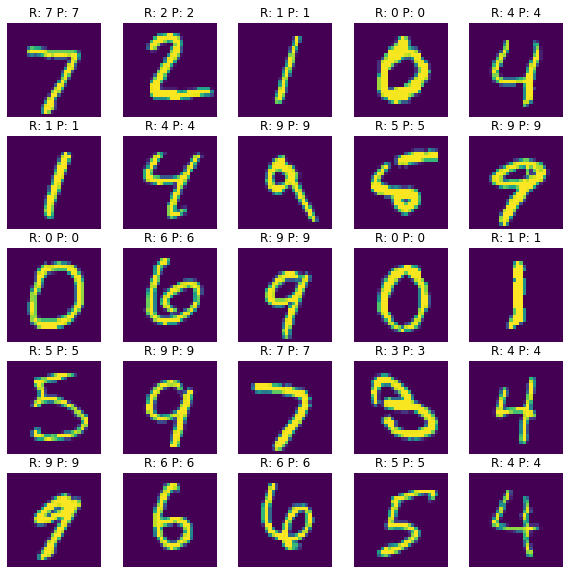

In [50]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt_row = 5
plt_col = 5



plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row * plt_col):
    if np.argmax(y_test[i]) != np.argmax(yhat_test[i]): # ==를 !=로 바꾸면 정답인 이미지를 표시해줌.
        i += 1
        continue
        
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(img_rows, img_cols))
    sub_plt_title = 'R: '+ str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i+=1
    cnt += 1
    
plt.show()